# Plotting Attractor Projections

In this notebook we plot 2D projections of the L96-EBM attractors for different values of S

In [1]:
# Imports 
from plotting_IO import *
from scipy.interpolate import interp1d

In [ ]:
plot_save_directory = '/Users/cfn18/Documents/PhD-Work/Third-Year/Thesis/img/L96-EBM/'

Will save at:

/Users/cfn18/Documents/PhD-Work/Third-Year/Thesis/img/L96-EBM//Attractor-MT-Projections-Different-S.pdf


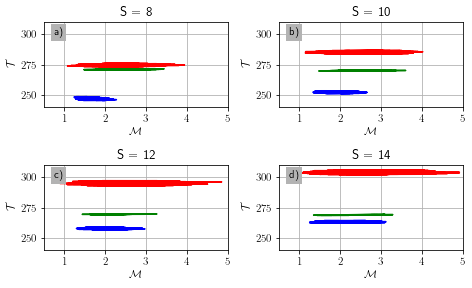

In [8]:
# Plotting Attractor Projections

fig, axes = init_2d_fax(ncols=2, nrows=2)

# Values of S we look at
sb_S_values = np.arange(7, 16)
w_S_values = np.arange(8, 17)
m_S_values = np.arange(8, 16)

# Loop through S values to make plots
for i, S in enumerate([8, 10, 12, 14]):
    ax = axes.flatten()[i]
    
    # Fetch Data
    sb_attractor = get_sb_attractor(S=S)
    w_attractor = get_w_attractor(S=S)
    m_state = get_m_state(S=S)
    
    for x in [sb_attractor, w_attractor, m_state]:
        x.MT_plot(fax=[fig, ax])
        
    ax.set_title(f'S = {S}')
    ax.grid()
    ax.set_ylim(240, 310)
    ax.set_xlim(0.5, 5)
fig.tight_layout()

save_name = plot_save_directory + '/Attractor-MT-Projections-Different-S.pdf'
print(f'Will save at:\n\n{save_name}')
# fig.savefig(save_name)